In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from OptionChainCalculator import OptionChain

For data, this notebook uses a put option chain on Citi expiry 02/02/24 from 1/31/2024

In [2]:
# read data
file_path = 'put in your own filepath'
data = pd.read_excel(file_path)
data.head()

,Unnamed: 0,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,0,C240202P00030000,2024-01-03 2:48PM EST,30.0,0.01,0.0,0.01,0.0,-,1,13,243.75%
1,1,C240202P00035000,2023-12-22 1:21PM EST,35.0,0.03,0.0,0.04,0.0,-,12,12,218.75%
2,2,C240202P00038000,2024-01-12 9:33AM EST,38.0,0.01,0.0,1.27,0.0,-,-,50,342.19%
3,3,C240202P00039000,2024-01-05 10:25AM EST,39.0,0.02,0.0,1.27,0.0,-,1,0,324.61%
4,4,C240202P00040000,2024-01-19 3:30PM EST,40.0,0.01,0.0,0.01,0.0,-,10,46,143.75%


In [3]:
# set parameters
spot = 56.74 # spot price
r = .01 # risk free rate
q = np.log(1+.0368) # dividend yield
todays_date = datetime.strptime('01_31_2024', '%m_%d_%Y') # today's date
typ = 'A' # American (A) or Euro (E)

In [4]:
# create option chain
option_chain_a = OptionChain(spot, r, q, todays_date, data, typ)
option_chain_a.data.head()

,Unnamed: 0,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,0,C240202P00030000,2024-01-03 2:48PM EST,30.0,0.01,0.0,0.01,0.0,-,1,13,243.75%
1,1,C240202P00035000,2023-12-22 1:21PM EST,35.0,0.03,0.0,0.04,0.0,-,12,12,218.75%
2,2,C240202P00038000,2024-01-12 9:33AM EST,38.0,0.01,0.0,1.27,0.0,-,-,50,342.19%
3,3,C240202P00039000,2024-01-05 10:25AM EST,39.0,0.02,0.0,1.27,0.0,-,1,0,324.61%
4,4,C240202P00040000,2024-01-19 3:30PM EST,40.0,0.01,0.0,0.01,0.0,-,10,46,143.75%


In [5]:
# calculate implied volatility
option_chain_a.iv_adder()
option_chain_a.data.head()

c:\Users\Xzavier\Documents\SpringIEOR\Personal Project\OptionChainCalculator.py:196: RuntimeWarning: invalid value encountered in sqrt
  init = np.sqrt((2*np.log(S*np.exp(r*T)/K))/(T))


,Unnamed: 0,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,imp_vol
0,0,C240202P00030000,2024-01-03 2:48PM EST,30.0,0.01,0.0,0.01,0.0,-,1,13,243.75%,2.472615
1,1,C240202P00035000,2023-12-22 1:21PM EST,35.0,0.03,0.0,0.04,0.0,-,12,12,218.75%,2.207879
2,2,C240202P00038000,2024-01-12 9:33AM EST,38.0,0.01,0.0,1.27,0.0,-,-,50,342.19%,3.443585
3,3,C240202P00039000,2024-01-05 10:25AM EST,39.0,0.02,0.0,1.27,0.0,-,1,0,324.61%,3.266239
4,4,C240202P00040000,2024-01-19 3:30PM EST,40.0,0.01,0.0,0.01,0.0,-,10,46,143.75%,1.415435


In [7]:
# calculate Greeks
option_chain_a.greeks_adder()
option_chain_a.data.head()

,Unnamed: 0,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,imp_vol,delta,gamma,vega,volga,vanna
0,0,C240202P00030000,2024-01-03 2:48PM EST,30.0,0.01,0.0,0.01,0.0,-,1,13,243.75%,2.472615,-0.001401,5.118883e-15,0.023127,-0.000170,0.000206
1,1,C240202P00035000,2023-12-22 1:21PM EST,35.0,0.03,0.0,0.04,0.0,-,12,12,218.75%,2.207879,-0.005649,6.465957e-15,0.081286,-0.000566,0.000725
2,2,C240202P00038000,2024-01-12 9:33AM EST,38.0,0.01,0.0,1.27,0.0,-,-,50,342.19%,3.443585,-0.073600,-2.413957e-13,0.704261,-0.005242,0.006243
3,3,C240202P00039000,2024-01-05 10:25AM EST,39.0,0.02,0.0,1.27,0.0,-,1,0,324.61%,3.266239,-0.074714,2.413957e-13,0.714335,-0.004987,0.006318
4,4,C240202P00040000,2024-01-19 3:30PM EST,40.0,0.01,0.0,0.01,0.0,-,10,46,143.75%,1.415435,-0.002445,-8.082447e-16,0.038387,-0.000362,-0.003341


In [8]:
# same as above except assume contract is Euro
option_chain_e = OptionChain(spot, r, q, todays_date, data, 'E')
option_chain_e.iv_adder()
option_chain_e.greeks_adder()

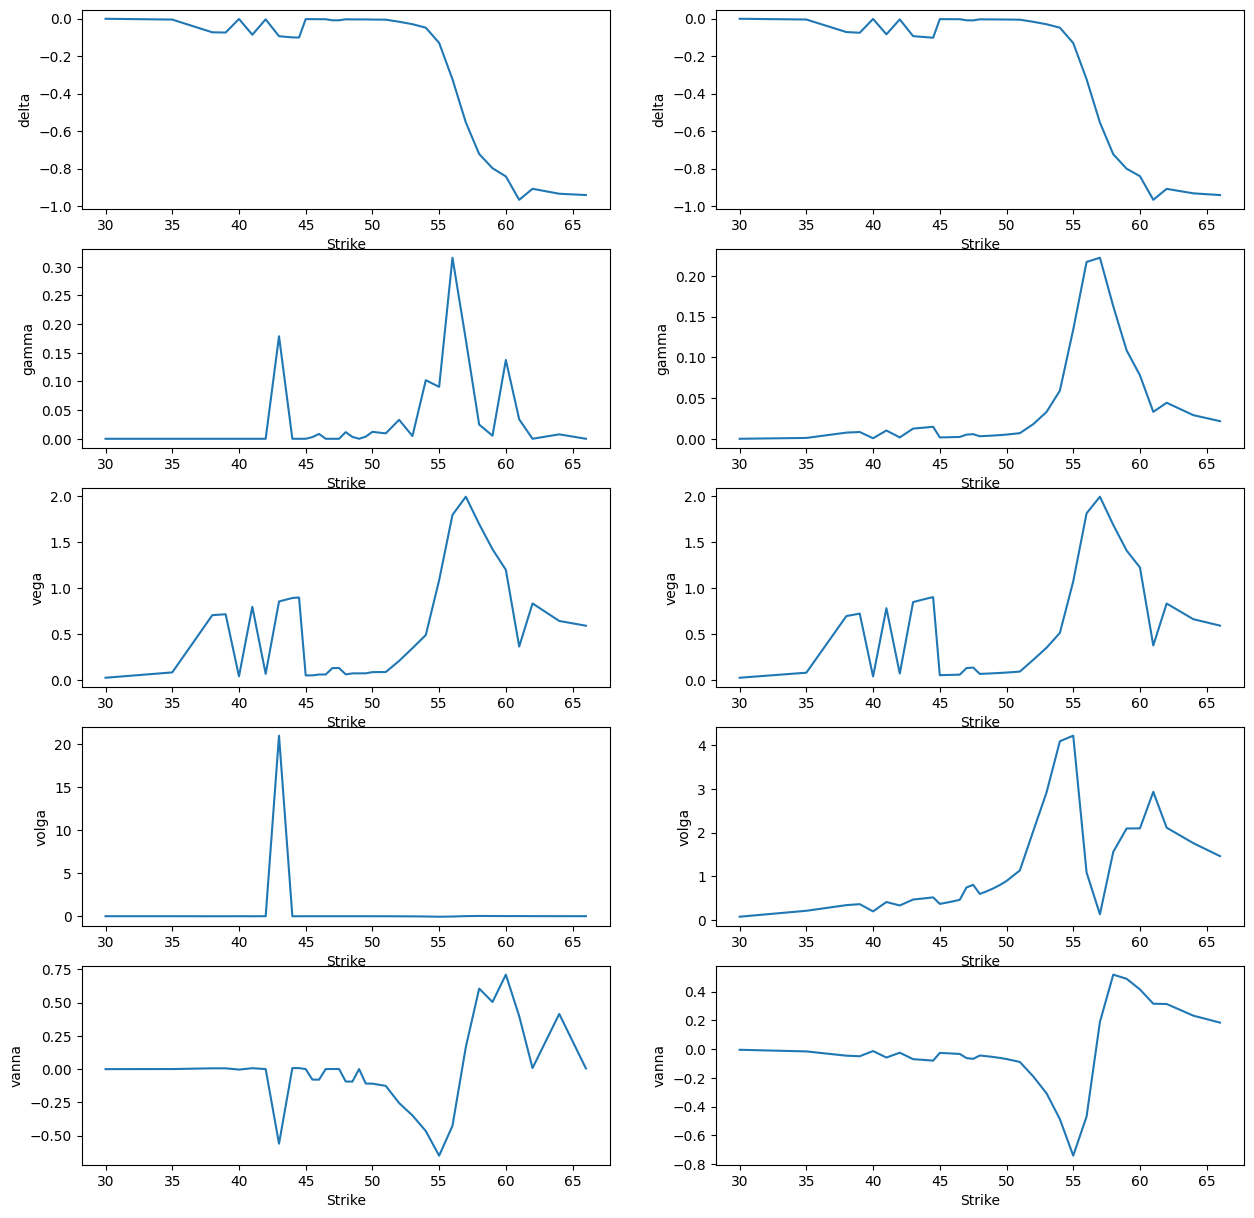

In [12]:
# plots of Greeks
fig, ax =plt.subplots(5,2)
sns.lineplot(data=option_chain_a.data, x='Strike', y = 'delta', ax=ax[0][0])
sns.lineplot(data=option_chain_a.data, x='Strike', y = 'gamma', ax=ax[1][0])
sns.lineplot(data=option_chain_a.data, x='Strike', y = 'vega', ax=ax[2][0])
sns.lineplot(data=option_chain_a.data, x='Strike', y = 'volga', ax=ax[3][0])
sns.lineplot(data=option_chain_a.data, x='Strike', y = 'vanna', ax=ax[4][0])

sns.lineplot(data=option_chain_e.data, x='Strike', y = 'delta', ax=ax[0][1])
sns.lineplot(data=option_chain_e.data, x='Strike', y = 'gamma', ax=ax[1][1])
sns.lineplot(data=option_chain_e.data, x='Strike', y = 'vega', ax=ax[2][1])
sns.lineplot(data=option_chain_e.data, x='Strike', y = 'volga', ax=ax[3][1])
sns.lineplot(data=option_chain_e.data, x='Strike', y = 'vanna', ax=ax[4][1])

#fig.show()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()